In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv('small_spam_dataset.csv')

In [72]:
df.sample(10)

,text,spam
16,Subject: confirm results of your refina [ n ] ...,1
324,"Subject: re : argentina modelling michael , ...",0
456,Subject: look what sandy is doing in her dorm ...,1
387,Subject: re : cover design / copy for energy d...,0
423,"Subject: re : confidential dale , thanks for...",0
493,Subject: enron global messaging announcement ...,0
291,Subject: mortgage for even the worst credit zw...,1
183,Subject: 9 % commission on myg annuities call...,1
281,Subject: rtp project thanks vince . i think t...,0
129,Subject: save your money buy getting this thin...,1


In [73]:
df.head()

,text,spam
0,Subject: wait too long and . . . 1147 secretl...,1
1,Subject: re : visual numerics cnl licensing is...,0
2,Subject: you don _ t know how to get into sear...,1
3,"Subject: re : contact vince , david ' s pare...",0
4,Subject: assume i will not be chairing . . . ...,0


In [74]:
df.tail()

,text,spam
495,Subject: proposal submission francois and ken...,0
496,Subject: winning one of our chopard and feel t...,1
497,Subject: your next investment should be this s...,1
498,"Subject: perfect logo charset = koi 8 - r "" > ...",1
499,Subject: re : f / u to dr . kaminski @ enron f...,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   spam    500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


DATA CLEANING


In [76]:
#missing value
df.isnull().sum()

text    0
spam    0
dtype: int64

In [77]:
df = df.dropna()

In [78]:
df.duplicated().sum()

np.int64(1)

In [79]:
df=df.drop_duplicates(keep='first')

In [80]:
df.shape

(499, 2)

EDA

In [81]:
df.head()

,text,spam
0,Subject: wait too long and . . . 1147 secretl...,1
1,Subject: re : visual numerics cnl licensing is...,0
2,Subject: you don _ t know how to get into sear...,1
3,"Subject: re : contact vince , david ' s pare...",0
4,Subject: assume i will not be chairing . . . ...,0


In [82]:
df.value_counts()

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [83]:
df['text'].value_counts()

text
Subject: re : f / u to dr . kaminski @ enron from iris mack  hi again ,  i am visiting several family members and friends over the next few days .  therefore it will be hard to contact me .  however , next week i will be easier to reach . my contact details in nyc are  as follows . i will be staying at the following hotels :  washington square hotel  from november 28 th for 3 nights ( tue , wed and thur )  212 . 777 . 9515  marriott nyc financial  december lst for 1 night ( fri )  212 . 385 . 4900  at any rate , i will still try to reach you on tomorrow morning . if all  fails , we will try to reach each other next week .  happy thanksgiving ,  iris  > from : " iris mack "  > to : vince . j . kaminski @ enron . com  > subject : re : f / u to dr . kaminski @ enron from iris mack  > date : tue , 21 nov 2000 22 : 07 : 09  >  > hi ,  >  > how are you ? seems like we have had a bit of difficulty contacting each  > other . sorry i missed your call . i am now in nyc - until december 2 nd

In [84]:
df['spam'].value_counts()


spam
1    250
0    249
Name: count, dtype: int64

In [85]:
df['spam'].replace({1: 'ham', 0: 'spam'})
df['spam'].value_counts()


spam
1    250
0    249
Name: count, dtype: int64

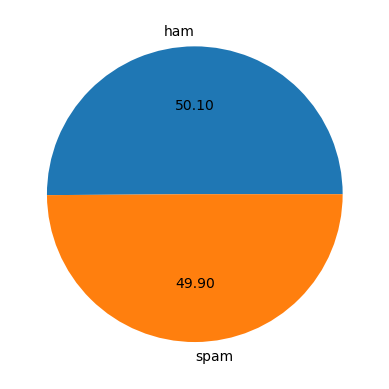

In [86]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(),labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [87]:
#almost 24 email is spam so dta is imbalance

In [88]:
import nltk  #natural lang tool kit

In [89]:
!pip install nltk

In [90]:
#df.head()

In [91]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [92]:
df['num_characters'] =df['text'].apply(len)


In [93]:
df.head()

,text,spam,num_characters
0,Subject: wait too long and . . . 1147 secretl...,1,138
1,Subject: re : visual numerics cnl licensing is...,0,3758
2,Subject: you don _ t know how to get into sear...,1,908
3,"Subject: re : contact vince , david ' s pare...",0,218
4,Subject: assume i will not be chairing . . . ...,0,1496


In [94]:
df['text'].apply(lambda x: len(str(x).split()))

0       25
1      797
2      233
3       52
4      363
      ... 
495    354
496    213
497    819
498    207
499    385
Name: text, Length: 499, dtype: int64

In [95]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [96]:
df.head()

,text,spam,num_characters,num_words
0,Subject: wait too long and . . . 1147 secretl...,1,138,26
1,Subject: re : visual numerics cnl licensing is...,0,3758,798
2,Subject: you don _ t know how to get into sear...,1,908,234
3,"Subject: re : contact vince , david ' s pare...",0,218,53
4,Subject: assume i will not be chairing . . . ...,0,1496,364


In [97]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0      [Subject, :, wait, too, long, and, ., ., ., 11...
1      [Subject, :, re, :, visual, numerics, cnl, lic...
2      [Subject, :, you, don, _, t, know, how, to, ge...
3      [Subject, :, re, :, contact, vince, ,, david, ...
4      [Subject, :, assume, i, will, not, be, chairin...
                             ...                        
495    [Subject, :, proposal, submission, francois, a...
496    [Subject, :, winning, one, of, our, chopard, a...
497    [Subject, :, your, next, investment, should, b...
498    [Subject, :, perfect, logo, charset, =, koi, 8...
499    [Subject, :, re, :, f, /, u, to, dr, ., kamins...
Name: text, Length: 499, dtype: object

In [98]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  # for words

0       26
1      798
2      234
3       53
4      364
      ... 
495    355
496    214
497    820
498    208
499    386
Name: text, Length: 499, dtype: int64

In [99]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [100]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: wait too long and . . . 1147 secretl...,1,138,26,4
1,Subject: re : visual numerics cnl licensing is...,0,3758,798,49
2,Subject: you don _ t know how to get into sear...,1,908,234,11
3,"Subject: re : contact vince , david ' s pare...",0,218,53,4
4,Subject: assume i will not be chairing . . . ...,0,1496,364,20


In [101]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,499.000000,499.000000,499.000000
mean,1564.971944,322.503006,19.304609
std,2322.699013,450.622547,23.633909
min,46.000000,7.000000,1.000000
25%,467.500000,94.000000,7.000000
50%,904.000000,198.000000,12.000000
75%,1697.000000,381.000000,20.000000
max,27965.000000,5691.000000,204.000000


In [102]:
#ham messages column 
df[df['spam'] == 0][['num_characters','num_words','num_sentences']].describe()  


,num_characters,num_words,num_sentences
count,249.000000,249.000000,249.000000
mean,1818.116466,382.791165,20.927711
std,2314.882000,462.788964,21.691449
min,91.000000,19.000000,1.000000
25%,661.000000,136.000000,8.000000
50%,1256.000000,275.000000,14.000000
75%,2134.000000,452.000000,24.000000
max,27965.000000,5691.000000,156.000000


In [103]:
#spam messages
df[df['spam'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,250.000000,250.000000,250.00000
mean,1312.840000,262.456000,17.68800
std,2307.551855,430.758731,25.36209
min,46.000000,7.000000,1.00000
25%,379.250000,80.000000,7.00000
50%,651.500000,131.500000,10.00000
75%,1072.750000,234.000000,18.00000
max,18999.000000,3363.000000,204.00000


In [104]:
import seaborn as sns

In [105]:
!pip install seaborn

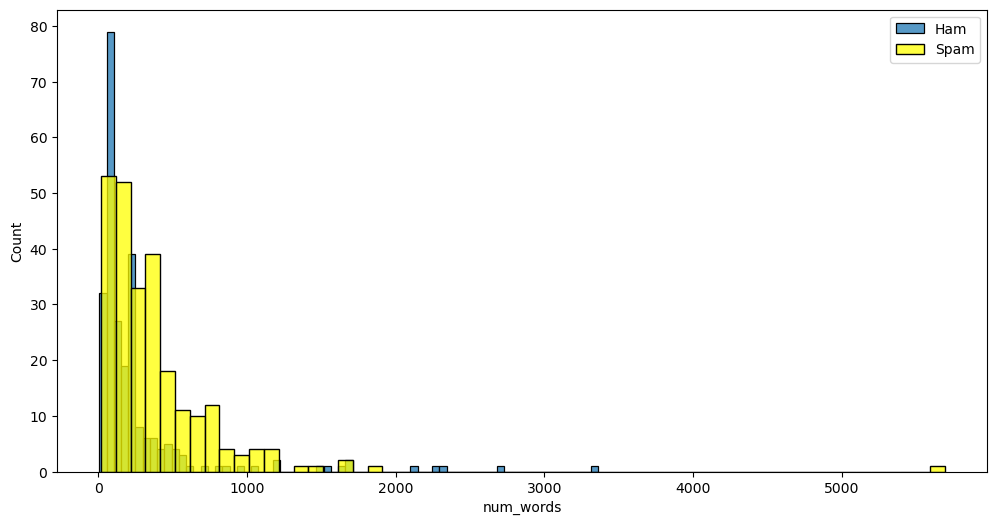

In [106]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 1]['num_words'], label='Ham' ) 
sns.histplot(df[df['spam'] == 0]['num_words'], color='yellow' ,label='Spam')
plt.legend()
#plt.xlabel('Number of Words')
#plt.ylabel('Count')
#plt.title('Distribution of Word Count in Ham vs Spam Messages')
#plt.show()


<Axes: xlabel='num_sentences', ylabel='Count'>

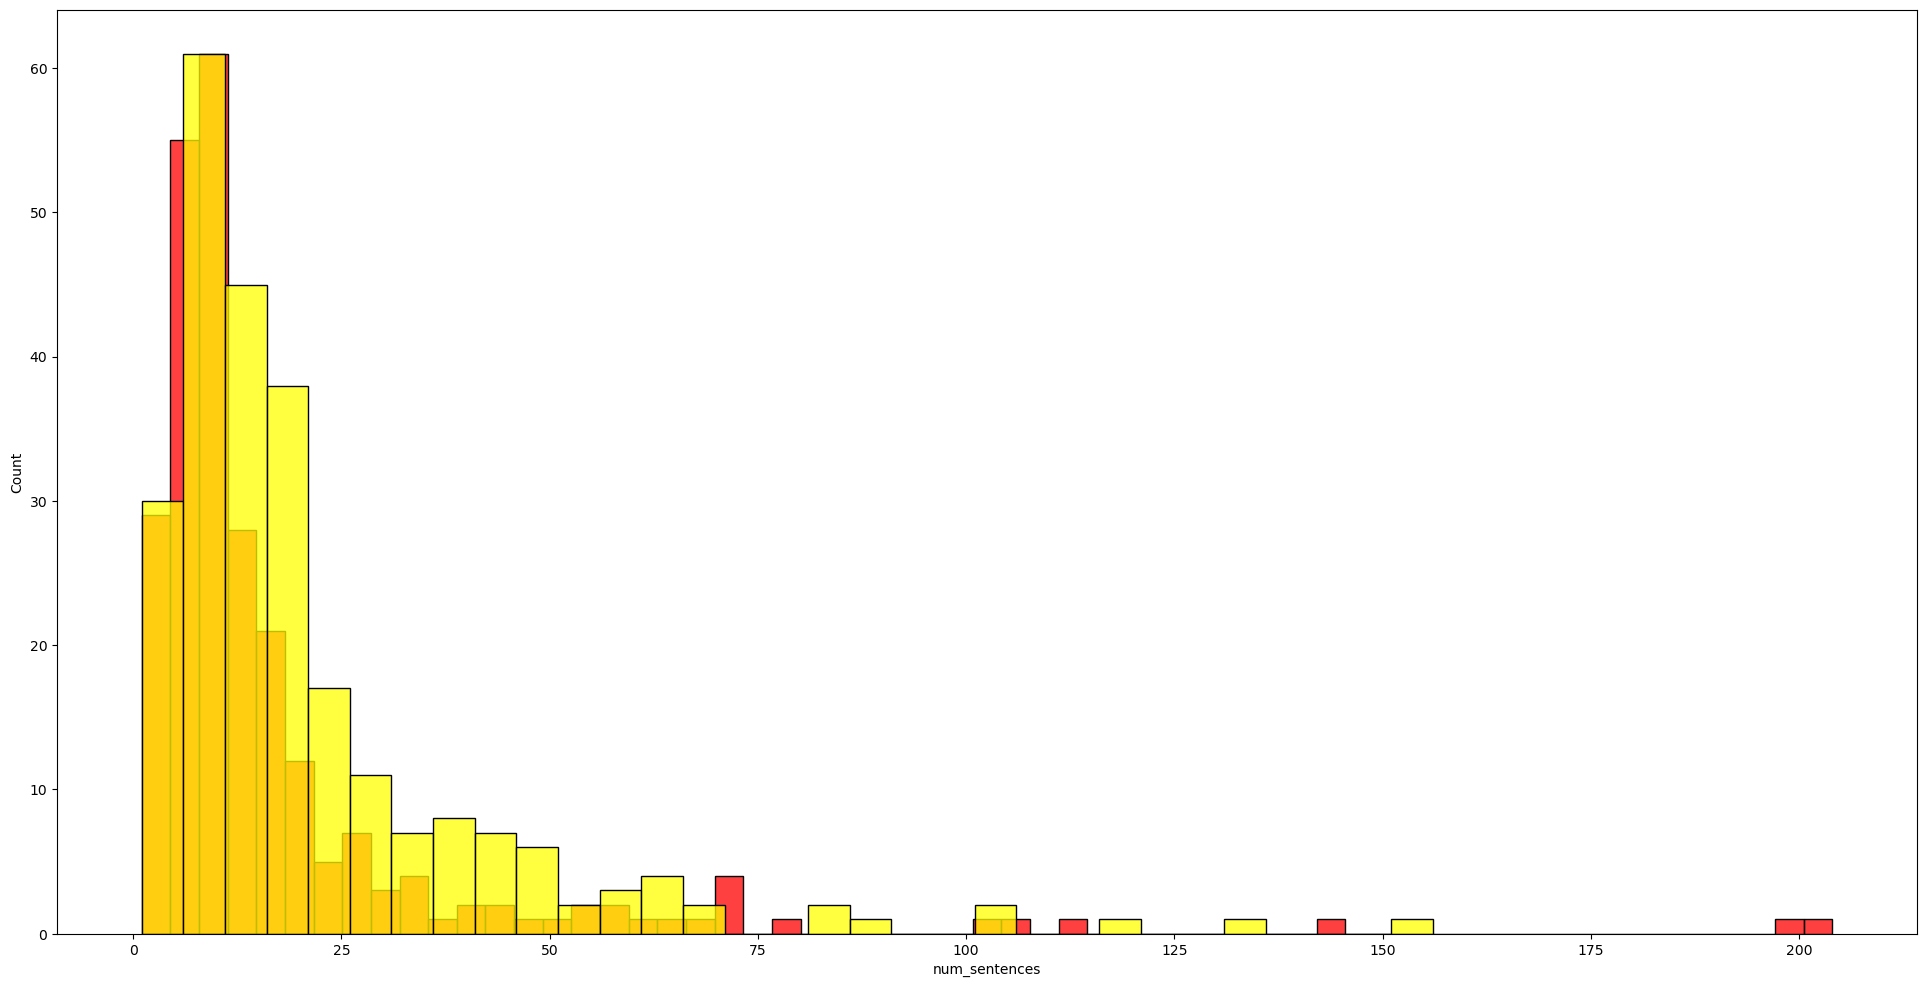

In [107]:
plt.figure(figsize=(24,12))
sns.histplot(df[df['spam'] == 1]['num_sentences'],color="red",label="ham")
sns.histplot(df[df['spam'] == 0]['num_sentences'],color='yellow' , label="spam" )

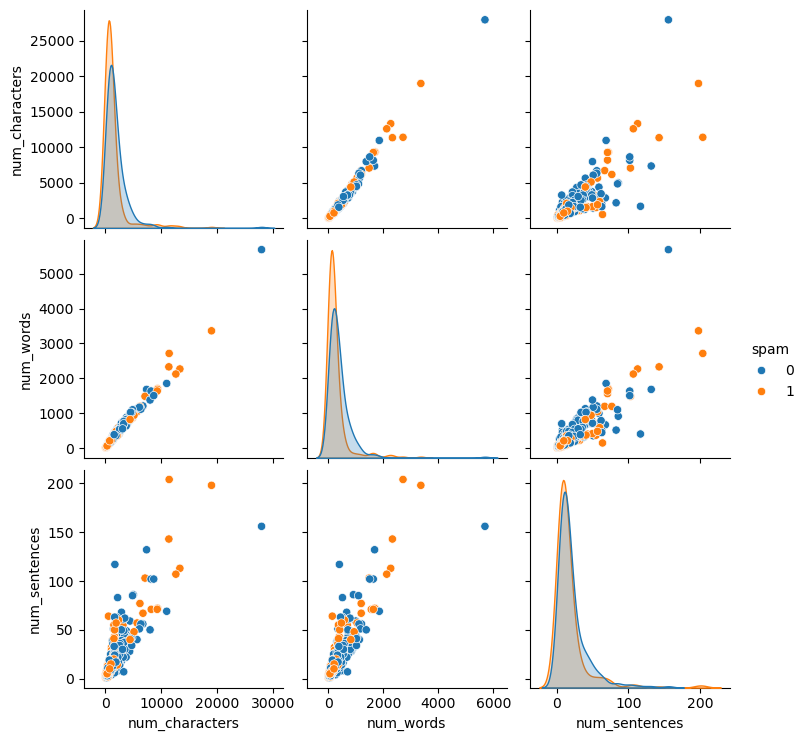

In [108]:
#relation bw no of words and sentences

sns.pairplot(df,hue='spam')

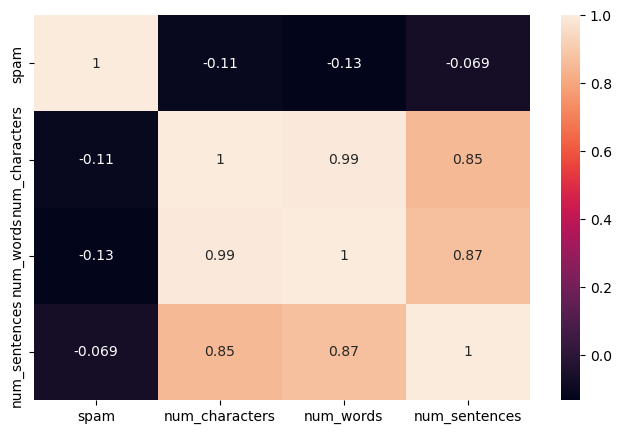

In [109]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, )
plt.show()


DATA PROCESSING KRENGE
lower case,tokenization,special char removal,

In [110]:
def transform_text(text):  #text provide krenge
    text = text.lower()     #lower case me convert krega
    return text

In [111]:
transform_text('Hi how are you' )

'hi how are you'

In [112]:
def transform_text(text):  #text provide krenge
    text = text.upper()     #lower case me convert krega
    return text

In [113]:
transform_text('Hi how are you' )

'HI HOW ARE YOU'

In [114]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)  #tokenization
    
    return text

In [115]:
transform_text('Hi how are you' )

['hi', 'how', 'are', 'you']

In [116]:
df['text'][100]   #removing special characters upto 100 texts 

'Subject: re : times 2 filing units  pat : out co # is 0413 , rc # is 107043 . please deliver them to eb 19 c 2 .  also , please let me know when they are going to be delivered as we have to  unload the lateral file cabinets that are currently in that room . will the  men who deliver the times 2 units remove the lateral files ? thanks . anita'

In [117]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #tokenization
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)   #append krega 
    return y

In [118]:
transform_text("I'm 90%%% gonna be home soon and i don't want to talk ")

['i',
 '90',
 'gon',
 'na',
 'be',
 'home',
 'soon',
 'and',
 'i',
 'do',
 'want',
 'to',
 'talk']

In [119]:
transform_text('Hi how are you Subject: re : doctor approved pill lgw  a man endowed with a 7 - 8 " hammer is simply  better equipped than a man with a 5 - 6 " hammer .' )

['hi',
 'how',
 'are',
 'you',
 'subject',
 're',
 'doctor',
 'approved',
 'pill',
 'lgw',
 'a',
 'man',
 'endowed',
 'with',
 'a',
 '7',
 '8',
 'hammer',
 'is',
 'simply',
 'better',
 'equipped',
 'than',
 'a',
 'man',
 'with',
 'a',
 '5',
 '6',
 'hammer']

In [120]:
import nltk
nltk.download('stopwords')   # sentence ke meaning me koi imp nhi hota h formation me hpta j


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [122]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #tokenization
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)   #append krega 


    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [123]:
import string 

In [124]:
transform_text('Hi! how are you RASHMI are you studing ML? ' )

['hi', 'rashmi', 'studing', 'ml']

In [125]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')
ps.stem('dancing')  #word ko root form me lata h

'danc'

In [126]:
transform_text('Hi! how are you RASHMI are you studing ML? ' )

['hi', 'rashmi', 'studing', 'ml']

In [127]:
transform_text("Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . ")

['subject',
 'las',
 'vegas',
 'high',
 'rise',
 'boom',
 'las',
 'vegas',
 'fast',
 'becoming',
 'major',
 'metropolitan',
 'city',
 '60',
 'new',
 'high',
 'rise',
 'towers',
 'expected',
 'built',
 'around',
 'las',
 'vegas',
 'strip',
 'within',
 'next',
 '3',
 '4',
 'years',
 '30',
 '000',
 'condominiums',
 'boom',
 'begun',
 'buy',
 'first',
 'early',
 'phase',
 'pre',
 'construction',
 'pricing',
 'available',
 'las',
 'vegas',
 'high',
 'rises',
 'including',
 'trump',
 'cosmopolitan',
 'mgm',
 'turnberry',
 'icon',
 'sky',
 'among',
 'others',
 'join',
 'interest',
 'list',
 'http',
 'www',
 'verticallv',
 'com',
 'message',
 'sent',
 'realty',
 'one',
 'highrise',
 'learn',
 'www',
 'verticallv',
 'comif',
 'wish',
 'excluded',
 'future',
 'mailings',
 'please',
 'reply',
 'word',
 'remove',
 'subject',
 'line']

In [128]:
df['text'][10]

'Subject: re : houston visit  soussan ,  it seems we have planned for all contingencies .  look forward to meeting you next week .  vince  " faiz , soussan " on 11 / 28 / 2000 06 : 51 : 51 pm  to : " \' vince . j . kaminski @ enron . com \' "  cc :  subject : re : houston visit  vince ,  your suggested arrangement is perfect with me and i love both italian or  steak . . . the choice is yours . i really look forward to our meeting vkaminski @ aol . com  subject : re : houston visit  soussan ,  let \' s meet at westin oaks next to the reception around 6 : 30 p . m . thursday .  there are several nice restaurants within a walking distance to the  galleria .  i shall make a reservation ( is italian or a steakhouse ok ? ) .  you can reach me on thursday at my cell phone 713 410 5396 .  look forward to meeting you .  vince  " faiz , soussan " on 11 / 27 / 2000 04 : 37 : 30 pm  to : " \' vince . j . kaminski @ enron . com \' "  cc :  subject : re : houston visit  great ! i look forward to our

In [129]:
df['text'].apply(transform_text)


0      [subject, wait, long, 1147, secretly, attract,...
1      [subject, visual, numerics, cnl, licensing, is...
2      [subject, know, get, search, engine, results, ...
3      [subject, contact, vince, david, parents, comi...
4      [subject, assume, chairing, dear, joel, receiv...
                             ...                        
495    [subject, proposal, submission, francois, kent...
496    [subject, winning, one, chopard, feel, triumph...
497    [subject, next, investment, sto, ck, pop, 3, m...
498    [subject, perfect, logo, charset, koi, 8, r, t...
499    [subject, f, u, dr, kaminski, enron, iris, mac...
Name: text, Length: 499, dtype: object

In [130]:
df['transformed_text'] = df['text'].apply(transform_text)

In [131]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: wait too long and . . . 1147 secretl...,1,138,26,4,"[subject, wait, long, 1147, secretly, attract,..."
1,Subject: re : visual numerics cnl licensing is...,0,3758,798,49,"[subject, visual, numerics, cnl, licensing, is..."
2,Subject: you don _ t know how to get into sear...,1,908,234,11,"[subject, know, get, search, engine, results, ..."
3,"Subject: re : contact vince , david ' s pare...",0,218,53,4,"[subject, contact, vince, david, parents, comi..."
4,Subject: assume i will not be chairing . . . ...,0,1496,364,20,"[subject, assume, chairing, dear, joel, receiv..."


In [132]:
!pip install WordCloud

In [133]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [134]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))


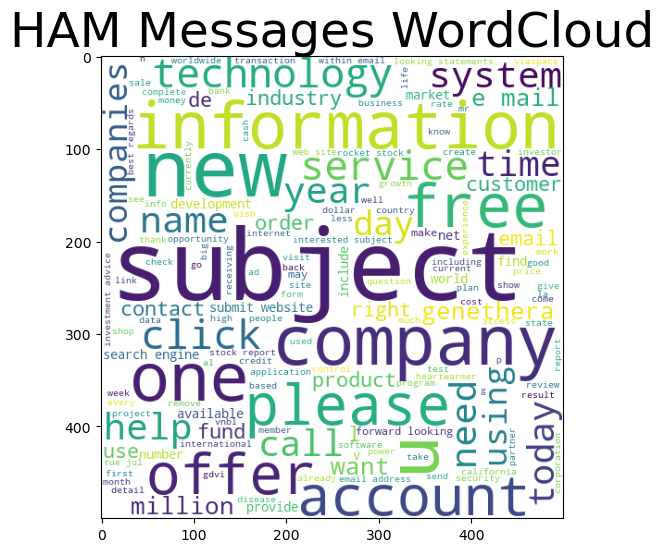

In [135]:
spam_wc = wc.generate(df[df['spam'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))

plt.title("HAM Messages WordCloud", fontsize=35)
plt.imshow(spam_wc)


#actally ham at 1

Text(0.5, 1.0, 'SPAM Messages WordCloud')

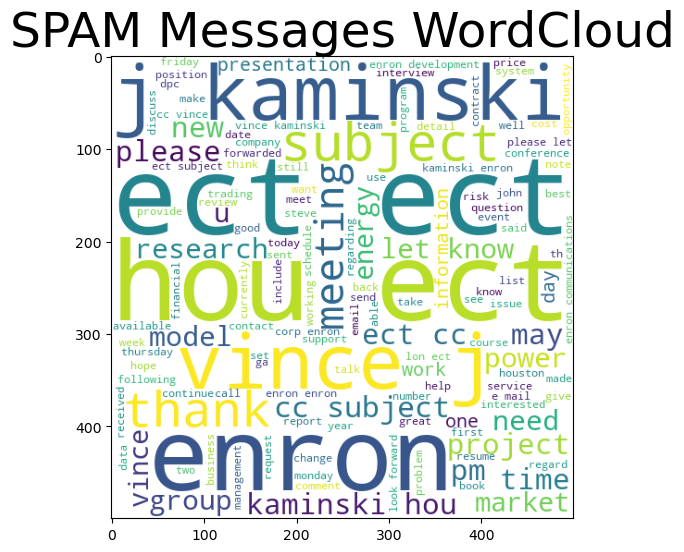

In [136]:
spam_wc = wc.generate(df[df['spam'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

plt.title("SPAM Messages WordCloud", fontsize=35)

#at 0 it is actually spam

In [137]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: wait too long and . . . 1147 secretl...,1,138,26,4,subject wait long 1147 secretly attract women ...
1,Subject: re : visual numerics cnl licensing is...,0,3758,798,49,subject visual numerics cnl licensing issues a...
2,Subject: you don _ t know how to get into sear...,1,908,234,11,subject know get search engine results submitt...
3,"Subject: re : contact vince , david ' s pare...",0,218,53,4,subject contact vince david parents coming vis...
4,Subject: assume i will not be chairing . . . ...,0,1496,364,20,subject assume chairing dear joel received rep...


infinite sentence showing 


In [138]:
!pip install Counter

  Using cached Counter-1.0.0.tar.gz (5.2 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5412 sha256=e1d5b73dd4ced5ed5e6c97c321312ddeeb836104ef47c9d4e041d0ae492585cf
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\04\74\15\ca37c78a9593c79051a2c9a22e2a81f241fd8ff5b8c945f2bc
Successfully built Counter


  DEPRECATION: Building 'Counter' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'Counter'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [139]:
ham_corpus = []  #initially is 1
for messages in df[df['spam'] == 1]['transformed_text'].tolist():
    for words in messages.split():
        ham_corpus.append(words)

In [140]:
len(ham_corpus)

31555

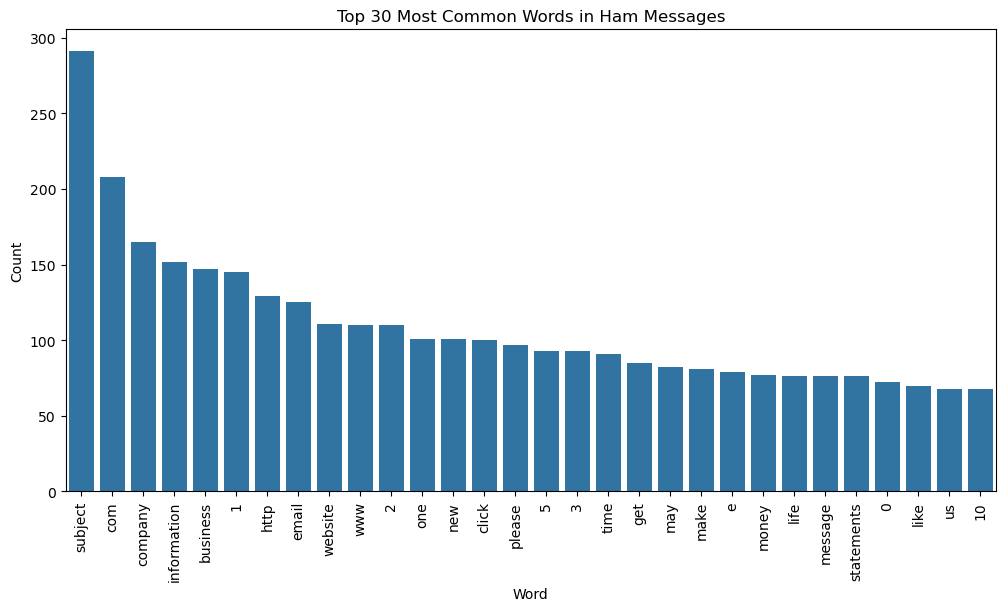

In [141]:
from collections import Counter
word_count = Counter(ham_corpus).most_common(30)  #top 30 word ko count kreg

df_wc = pd.DataFrame(word_count, columns=['Word', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Count', data=df_wc)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

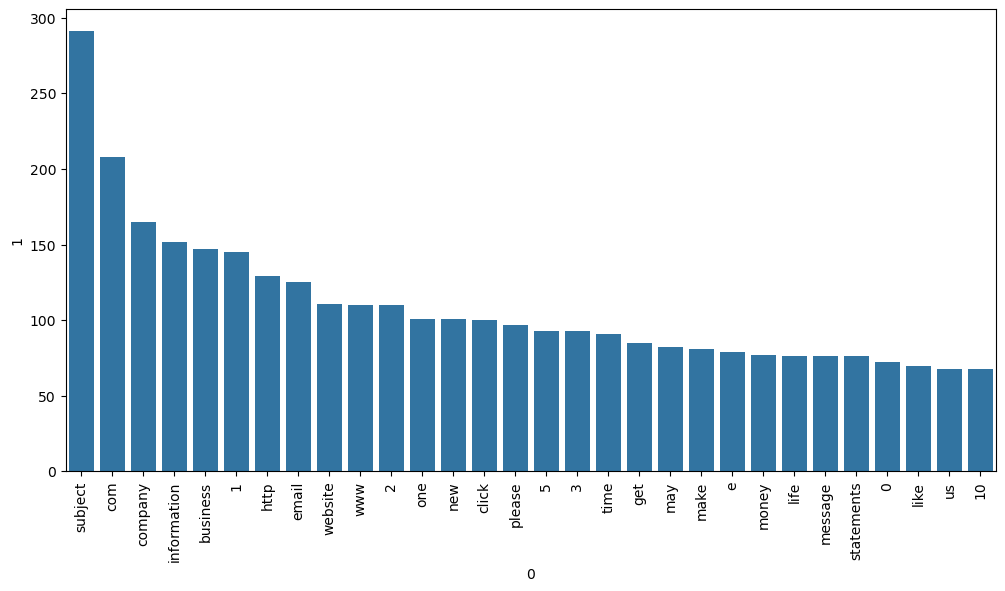

In [142]:
from collections import Counter
df_top30 = pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.figure(figsize=(12,6))
sns.barplot(x=df_top30[0], y=df_top30[1])
plt.xlabel("0")  # label x-axis as 0
plt.ylabel("1")
plt.xticks(rotation='vertical')
plt.show()

In [143]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: wait too long and . . . 1147 secretl...,1,138,26,4,subject wait long 1147 secretly attract women ...
1,Subject: re : visual numerics cnl licensing is...,0,3758,798,49,subject visual numerics cnl licensing issues a...
2,Subject: you don _ t know how to get into sear...,1,908,234,11,subject know get search engine results submitt...
3,"Subject: re : contact vince , david ' s pare...",0,218,53,4,subject contact vince david parents coming vis...
4,Subject: assume i will not be chairing . . . ...,0,1496,364,20,subject assume chairing dear joel received rep...


In [144]:
spam_corpus = []
for messages in df[df['spam'] == 0]['transformed_text'].tolist():
    for words in messages.split():
        spam_corpus.append(words)




In [145]:
len(spam_corpus)

44987

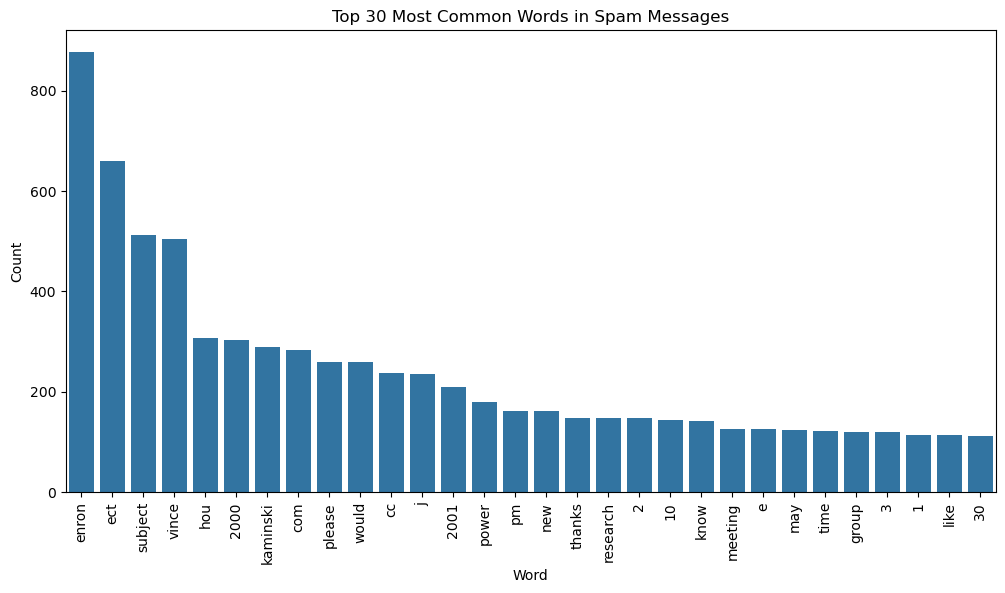

In [146]:
from collections import Counter
word_count = Counter(spam_corpus).most_common(30)  #top 30 word ko count kreg

df_wc = pd.DataFrame(word_count, columns=['Word', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Count', data=df_wc)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

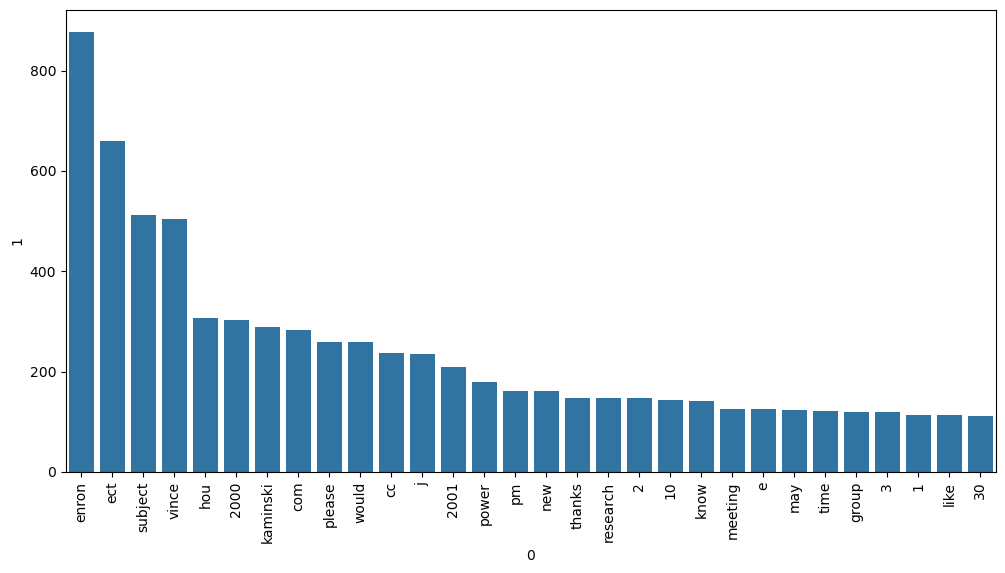

In [147]:
from collections import Counter
df_top30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
plt.figure(figsize=(12,6))
sns.barplot(x=df_top30[0], y=df_top30[1])
plt.xlabel("0")  # label x-axis as 0
plt.ylabel("1")
plt.xticks(rotation='vertical')
plt.show()

In [148]:
df.head()


,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: wait too long and . . . 1147 secretl...,1,138,26,4,subject wait long 1147 secretly attract women ...
1,Subject: re : visual numerics cnl licensing is...,0,3758,798,49,subject visual numerics cnl licensing issues a...
2,Subject: you don _ t know how to get into sear...,1,908,234,11,subject know get search engine results submitt...
3,"Subject: re : contact vince , david ' s pare...",0,218,53,4,subject contact vince david parents coming vis...
4,Subject: assume i will not be chairing . . . ...,0,1496,364,20,subject assume chairing dear joel received rep...


MODEL BUILDING

by naive bayes


In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [150]:

X = cv.fit_transform(df['transformed_text']).toarray()

In [151]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [152]:
X.shape   #5695=MESSAGE, 37158=WORDS

(499, 3000)

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
y = df['spam'].values

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
import pickle

# 1. TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['spam']

# 2. Split into train and test BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 3. Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 4. Train model
model = MultinomialNB()
model.fit(X_train_res, y_train_res)

# 5. Evaluate (optional)
print(model.score(X_test, y_test))

# 6. Save both
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))


0.98


In [158]:
print(hasattr(model, "class_count_"))


True


In [159]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [160]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [161]:
gnb.fit(X_train,y_train)  #gaussian naive bayes
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.93
[[42  1]
 [ 6 51]]
0.9807692307692307


In [162]:
mnb.fit(X_train,y_train)  #multinomial naive bayes
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.98
[[42  1]
 [ 1 56]]
0.9824561403508771


In [163]:
bnb.fit(X_train,y_train)  #bernoulii
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.88
[[32 11]
 [ 1 56]]
0.835820895522388


In [164]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 4.3 MB/s eta 0:00:17
   - -------------------------------------- 1.8/72.0 MB 4.7 MB/s eta 0:00:15
   - -------------------------------------- 3.1/72.0 MB 5.1 MB/s eta 0:00:14
   -- ------------------------------------- 4.2/72.0 MB 5.1 MB/s eta 0:00:14
   -- ------------------------------------- 5.0/72.0 MB 4.7 MB/s eta 0:00:15
   --- ------------------------------------ 6.0/72.0 MB 4.8 MB/s eta 0:00:14
   ---- ----------------------------------- 7.3/72.0 MB 4.9 MB/s eta 0:00:14
   ---- ----------------------------------- 8.4/72.0 MB 5.0 MB/s eta 0:00:13
   ----- ---------------------------------- 9.7/72.0 MB 5.1 MB/s eta 0:00:13
   ----- ---------------------------------- 10.7/72.0 MB 5.1 MB/s eta 0:00:13
   ------ --------------------------------- 11.8/72.0 MB 5.0 MB/s eta 0:00:13
   ------- -------------------------------- 12.8/72.0 MB 5.0 MB/s eta 0:00:12
   

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [166]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [167]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [168]:
def train_classifier(clf,X_train,y_train,X_test,y_test):  # training aur testing data devrhe h
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [169]:
train_classifier(svc,X_train,y_train,X_test,y_test)  #accuracy and precision

(0.98, 0.9824561403508771)

precission materrs along with accuracy


In [170]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision) 

For  SVC
Accuracy -  0.98
Precision -  0.9824561403508771
For  KN
Accuracy -  0.97
Precision -  0.9821428571428571
For  NB
Accuracy -  0.98
Precision -  0.9824561403508771
For  DT
Accuracy -  0.95
Precision -  0.9642857142857143
For  LR
Accuracy -  0.91
Precision -  0.8636363636363636
For  RF
Accuracy -  0.96
Precision -  0.9649122807017544
For  AdaBoost
Accuracy -  0.97
Precision -  0.9655172413793104
For  BgC
Accuracy -  0.97
Precision -  0.9655172413793104
For  ETC
Accuracy -  0.99
Precision -  1.0
For  GBDT
Accuracy -  0.96
Precision -  0.9344262295081968
For  xgb
Accuracy -  0.96
Precision -  0.9649122807017544


In [171]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [172]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.99,1.000000
2,NB,0.98,0.982456
0,SVC,0.98,0.982456
1,KN,0.97,0.982143
6,AdaBoost,0.97,0.965517
7,BgC,0.97,0.965517
5,RF,0.96,0.964912
10,xgb,0.96,0.964912
3,DT,0.95,0.964286
9,GBDT,0.96,0.934426


In [173]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [174]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.990000
1,NB,Accuracy,0.980000
2,SVC,Accuracy,0.980000
3,KN,Accuracy,0.970000
4,AdaBoost,Accuracy,0.970000
5,BgC,Accuracy,0.970000
6,RF,Accuracy,0.960000
7,xgb,Accuracy,0.960000
8,DT,Accuracy,0.950000
9,GBDT,Accuracy,0.960000


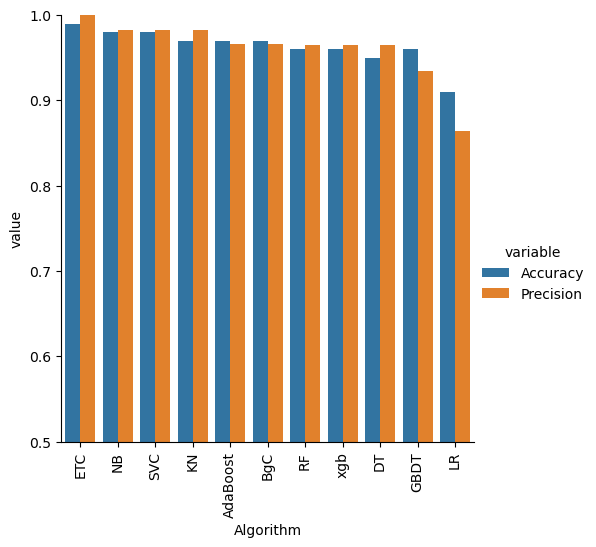

In [175]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [176]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [177]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [178]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [179]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [180]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [181]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [182]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.99,1.000000,0.99,1.000000,0.99,1.000000,0.99,1.000000
1,NB,0.98,0.982456,0.98,0.982456,0.98,0.982456,0.98,0.982456
2,SVC,0.98,0.982456,0.98,0.982456,0.98,0.982456,0.98,0.982456
3,KN,0.97,0.982143,0.97,0.982143,0.97,0.982143,0.97,0.982143
4,AdaBoost,0.97,0.965517,0.97,0.965517,0.97,0.965517,0.97,0.965517
5,BgC,0.97,0.965517,0.97,0.965517,0.97,0.965517,0.97,0.965517
6,RF,0.96,0.964912,0.96,0.964912,0.96,0.964912,0.96,0.964912
7,xgb,0.96,0.964912,0.96,0.964912,0.96,0.964912,0.96,0.964912
8,DT,0.95,0.964286,0.95,0.964286,0.95,0.964286,0.95,0.964286
9,GBDT,0.96,0.934426,0.96,0.934426,0.96,0.934426,0.96,0.934426


In [183]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [184]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [185]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [186]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.98
Precision 0.9824561403508771


In [187]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [188]:
from sklearn.ensemble import StackingClassifier

In [189]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [190]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.98
Precision 0.9824561403508771


In [191]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [192]:
!pip install gradio


  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.50.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/23.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/23.0 MB 3.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.8/23.0 MB 4.4 MB/s eta 0:00:05
   ---- ----------------------------------- 2.6/23.0 MB 4.1 MB/s eta 0:00:05
   ----- ---------------------------------- 3.4/23.0 MB 4.0 MB/s eta 0:00:05
   ------- -------------------------------- 4.2/23.0 MB 4.1 MB/s eta 0:00:05
   --------- ------------------------------ 5.2/23.0 MB 4.2 MB/s eta 

In [193]:
import pickle

model = pickle.load(open('model.pkl', 'rb'))
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))


In [ ]:
import gradio as gr
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Download required NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

# Same preprocessing used in training
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    return " ".join(y)

# Load saved model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))

# Prediction function
def predict_spam(text):
    transformed_text = transform_text(text)
    vector_input = tfidf.transform([transformed_text]).toarray()
    result = model.predict(vector_input)[0]
    if result == 1:
        return "🚨 Spam"
    else:
        return "✅ Not Spam"

# Create interface
iface = gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(lines=3, placeholder="Enter your message here..."),
    outputs="text",
    title="Spam Message Classifier",
    description="Detect whether a message is Spam or Not Spam."
)

# Launch app
iface.launch()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\Dell\anaconda\Lib\site-packages\gradio\queueing.py", line 766, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "c:\Users\Dell\anaconda\Lib\site-packages\gradio\route_utils.py", line 355, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "c:\Users\Dell\anaconda\Lib\site-packages\gradio\blocks.py", line 2152, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<8 lines>...
    )
    ^
  File "c:\Users\Dell\anaconda\Lib\site-packages\gradio\blocks.py", line 1629, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        fn, *processed_input, limiter=self.limiter
        ^^^^^^^^^^